In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Reading the CSV files

In [2]:
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')

# Understanding the data

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<Axes: xlabel='SibSp'>

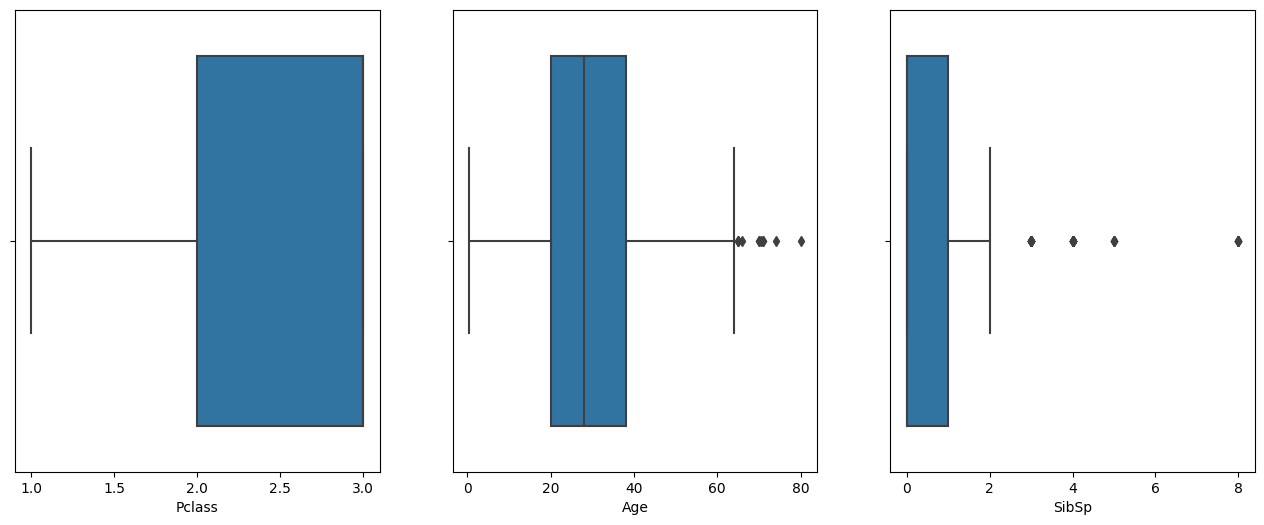

In [9]:
fig, axs = plt.subplots(ncols=3, figsize=(16,6))
sns.boxplot(data=train_data, x='Pclass', ax=axs[0])
sns.boxplot(data=train_data, x='Age', ax=axs[1])
sns.boxplot(data=train_data, x='SibSp', ax=axs[2])

<Axes: xlabel='Fare'>

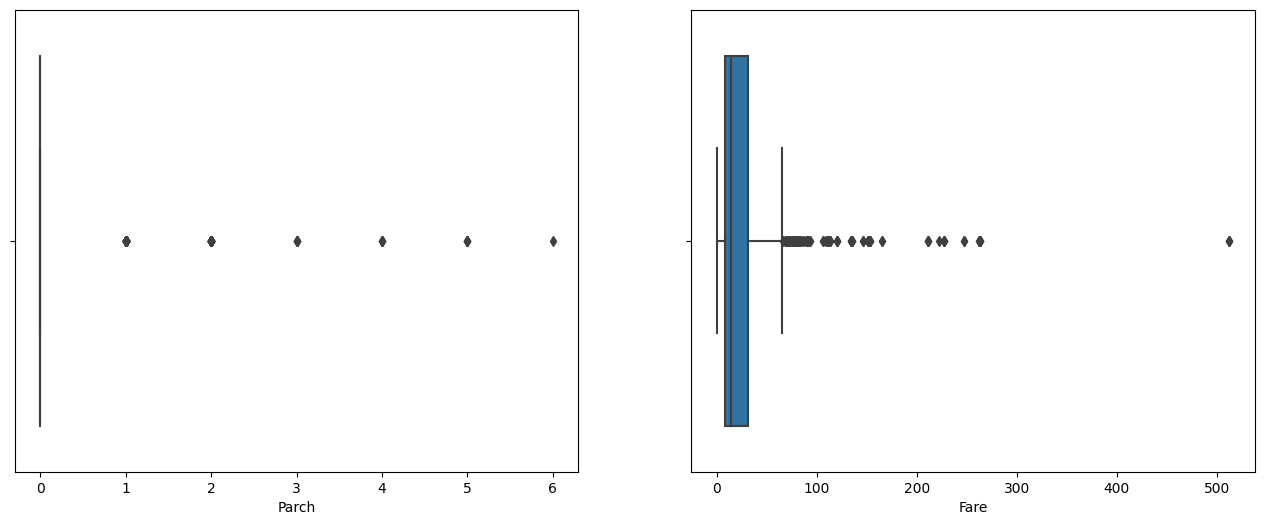

In [10]:
fig, axs = plt.subplots(ncols=2, figsize=(16,6))
sns.boxplot(data=train_data, x='Parch', ax=axs[0])
sns.boxplot(data=train_data, x='Fare', ax=axs[1])

# Handling missing values

In [11]:
test_passenger_id = test_data['PassengerId']
train_data = train_data.drop(['Parch', 'Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1)
test_data = test_data.drop(['Parch', 'Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1)

In [12]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,male,22.0,1,7.2500,S
1,1,1,female,38.0,1,71.2833,C
2,1,3,female,26.0,0,7.9250,S
3,1,1,female,35.0,1,53.1000,S
4,0,3,male,35.0,0,8.0500,S


In [13]:
train_data.shape

(891, 7)

In [14]:
test_data.shape

(418, 6)

In [15]:
train_data['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [16]:
train_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Fare          0
Embarked      2
dtype: int64

In [17]:
train_age_median = train_data['Age'].median()

In [18]:
values = {'Embarked': 'S', 'Age': train_age_median}
train_data = train_data.fillna(value=values)

In [19]:
train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Fare        0
Embarked    0
dtype: int64

In [20]:
test_data.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Fare         1
Embarked     0
dtype: int64

<Axes: xlabel='Fare'>

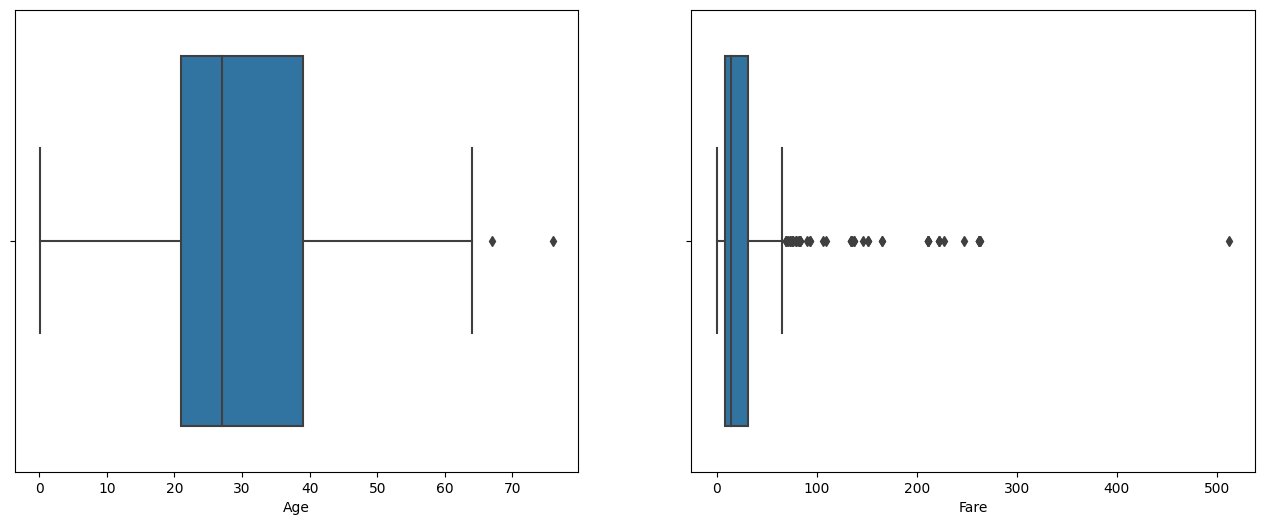

In [21]:
fig, axs = plt.subplots(ncols=2, figsize=(16,6))
sns.boxplot(data=test_data, x='Age', ax=axs[0])
sns.boxplot(data=test_data, x='Fare', ax=axs[1])

In [22]:
test_age_median = test_data['Age'].median()
test_fare_median = test_data['Fare'].median()
values = {'Age': test_age_median, 'Fare': test_fare_median}

In [23]:
test_data = test_data.fillna(value=values)

In [24]:
test_data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Fare        0
Embarked    0
dtype: int64

# Handling outliers

<Axes: xlabel='Fare'>

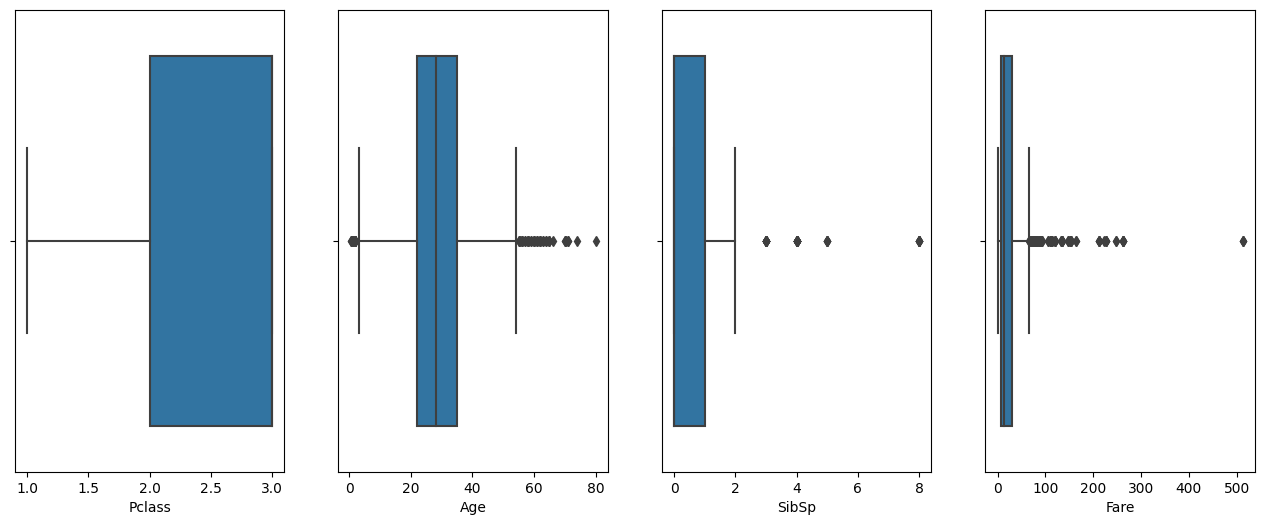

In [25]:
fig, axs = plt.subplots(ncols=4, figsize=(16,6))
sns.boxplot(data=train_data, x='Pclass', ax=axs[0])
sns.boxplot(data=train_data, x='Age', ax=axs[1])
sns.boxplot(data=train_data, x='SibSp', ax=axs[2])
sns.boxplot(data=train_data, x='Fare', ax=axs[3])

In [26]:
outliers_to_drop = train_data[(train_data['Age'] > 70) | (train_data['SibSp'] > 5) | (train_data['Fare'] > 200)].index
outliers_to_drop

Index([ 27,  88,  96, 116, 118, 159, 180, 201, 258, 299, 311, 324, 341, 377,
       380, 438, 493, 527, 557, 630, 679, 689, 700, 716, 730, 737, 742, 779,
       792, 846, 851, 863],
      dtype='int64')

In [27]:
train_data = train_data.drop(outliers_to_drop, axis=0)

In [28]:
train_data.shape

(859, 7)

<Axes: xlabel='Fare'>

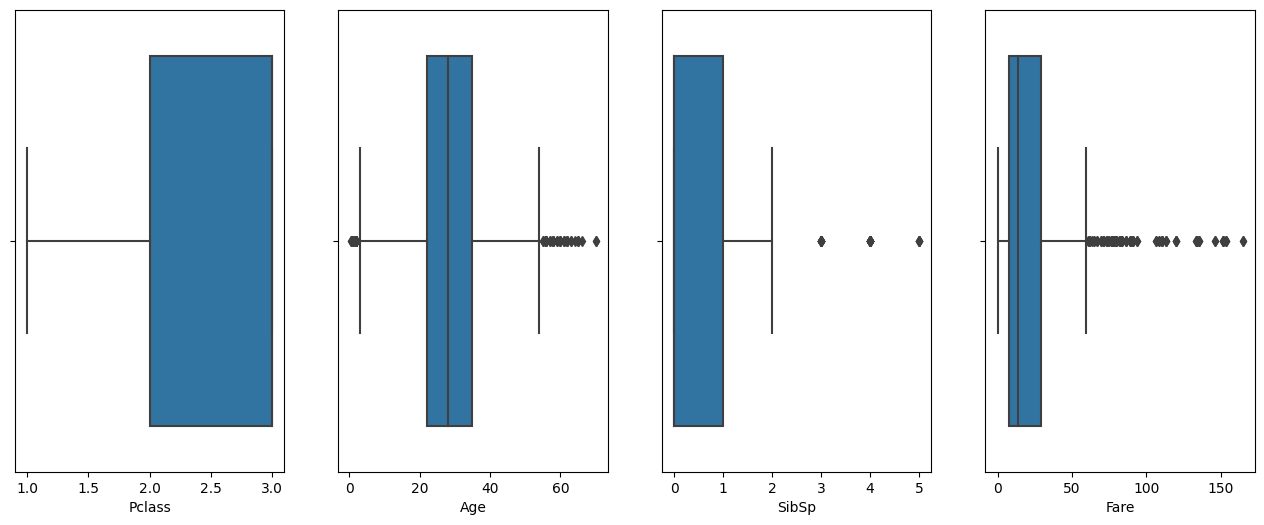

In [29]:
fig, axs = plt.subplots(ncols=4, figsize=(16,6))
sns.boxplot(data=train_data, x='Pclass', ax=axs[0])
sns.boxplot(data=train_data, x='Age', ax=axs[1])
sns.boxplot(data=train_data, x='SibSp', ax=axs[2])
sns.boxplot(data=train_data, x='Fare', ax=axs[3])

In [30]:
train_data

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,male,22.0,1,7.2500,S
1,1,1,female,38.0,1,71.2833,C
2,1,3,female,26.0,0,7.9250,S
3,1,1,female,35.0,1,53.1000,S
4,0,3,male,35.0,0,8.0500,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,13.0000,S
887,1,1,female,19.0,0,30.0000,S
888,0,3,female,28.0,1,23.4500,S
889,1,1,male,26.0,0,30.0000,C


In [31]:
train_data = train_data.reset_index(drop=True)

# Splitting X and y

In [32]:
y_train = train_data['Survived']
X_train = train_data.drop(['Survived'], axis=1)

In [33]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
854    0
855    1
856    0
857    1
858    0
Name: Survived, Length: 859, dtype: int64

In [34]:
X_train

,Pclass,Sex,Age,SibSp,Fare,Embarked
0,3,male,22.0,1,7.2500,S
1,1,female,38.0,1,71.2833,C
2,3,female,26.0,0,7.9250,S
3,1,female,35.0,1,53.1000,S
4,3,male,35.0,0,8.0500,S
...,...,...,...,...,...,...
854,2,male,27.0,0,13.0000,S
855,1,female,19.0,0,30.0000,S
856,3,female,28.0,1,23.4500,S
857,1,male,26.0,0,30.0000,C


In [35]:
X_train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked'], dtype='object')

# Turning catogericals to numerical

In [36]:
from sklearn.preprocessing import OneHotEncoder

In [37]:
encoder = OneHotEncoder(drop="first", sparse_output=False)

In [38]:
X_train.head()

,Pclass,Sex,Age,SibSp,Fare,Embarked
0,3,male,22.0,1,7.2500,S
1,1,female,38.0,1,71.2833,C
2,3,female,26.0,0,7.9250,S
3,1,female,35.0,1,53.1000,S
4,3,male,35.0,0,8.0500,S


In [39]:
catogerical_cols = ['Sex', 'Embarked']

In [40]:
encoded_features = encoder.fit_transform(X_train[catogerical_cols])

In [41]:
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(catogerical_cols))
X_train_enc = pd.concat([X_train, encoded_df], axis=1)

In [42]:
X_train_enc.drop(catogerical_cols, axis=1, inplace=True)

In [43]:
X_train_enc.head()

,Pclass,Age,SibSp,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,7.2500,1.0,0.0,1.0
1,1,38.0,1,71.2833,0.0,0.0,0.0
2,3,26.0,0,7.9250,0.0,0.0,1.0
3,1,35.0,1,53.1000,0.0,0.0,1.0
4,3,35.0,0,8.0500,1.0,0.0,1.0


In [44]:
test_data.head()

,Pclass,Sex,Age,SibSp,Fare,Embarked
0,3,male,34.5,0,7.8292,Q
1,3,female,47.0,1,7.0000,S
2,2,male,62.0,0,9.6875,Q
3,3,male,27.0,0,8.6625,S
4,3,female,22.0,1,12.2875,S


In [45]:
encoded_features_test = encoder.transform(train_data[catogerical_cols])

In [46]:
encoded_test = pd.DataFrame(encoded_features_test,
                            columns=encoder.get_feature_names_out(catogerical_cols))
test_data_enc = pd.concat([test_data, encoded_test], axis=1)

In [47]:
test_data_enc.drop(catogerical_cols, axis=1, inplace=True)

In [48]:
test_data_enc.head()

,Pclass,Age,SibSp,Fare,Sex_male,Embarked_Q,Embarked_S
0,3.0,34.5,0.0,7.8292,1.0,0.0,1.0
1,3.0,47.0,1.0,7.0000,0.0,0.0,0.0
2,2.0,62.0,0.0,9.6875,0.0,0.0,1.0
3,3.0,27.0,0.0,8.6625,0.0,0.0,1.0
4,3.0,22.0,1.0,12.2875,1.0,0.0,1.0


In [49]:
test_data_enc.shape

(859, 7)

In [50]:
cols = X_train_enc.columns

# Feature Scaling

In [51]:
from sklearn.preprocessing import RobustScaler

In [52]:
robust_scaler = RobustScaler()

In [53]:
X_train_scaled = robust_scaler.fit_transform(X_train_enc)

In [54]:
X_train = pd.DataFrame(X_train_scaled, columns=cols)

In [55]:
X_train.head()

,Pclass,Age,SibSp,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.0,-0.461538,1.0,-0.294406,0.0,0.0,0.0
1,-2.0,0.769231,1.0,2.721878,-1.0,0.0,-1.0
2,0.0,-0.153846,0.0,-0.262610,-1.0,0.0,0.0
3,-2.0,0.538462,1.0,1.865355,-1.0,0.0,0.0
4,0.0,0.538462,0.0,-0.256722,0.0,0.0,0.0


In [56]:
test_data_scaled = robust_scaler.transform(test_data_enc)

In [57]:
test_data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Fare        0
Embarked    0
dtype: int64

In [58]:
test_data_scaled

array([[ 0.        ,  0.5       ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  1.46153846,  1.        , ..., -1.        ,
         0.        , -1.        ],
       [-1.        ,  2.61538462,  0.        , ..., -1.        ,
         0.        ,  0.        ],
       ...,
       [        nan,         nan,         nan, ..., -1.        ,
         0.        ,  0.        ],
       [        nan,         nan,         nan, ...,  0.        ,
         0.        , -1.        ],
       [        nan,         nan,         nan, ...,  0.        ,
         1.        , -1.        ]])

In [59]:
test_data = pd.DataFrame(test_data_scaled, columns=cols)

In [60]:
test_data.isnull().sum()

Pclass        441
Age           441
SibSp         441
Fare          441
Sex_male        0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [61]:
test_data = test_data.dropna(axis=0)

In [62]:
test_data.shape

(418, 7)

In [63]:
test_data.isnull().sum()

Pclass        0
Age           0
SibSp         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [64]:
test_data.head()

,Pclass,Age,SibSp,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.0,0.500000,0.0,-0.267123,0.0,0.0,0.0
1,0.0,1.461538,1.0,-0.306182,-1.0,0.0,-1.0
2,-1.0,2.615385,0.0,-0.179588,-1.0,0.0,0.0
3,0.0,-0.076923,0.0,-0.227870,-1.0,0.0,0.0
4,0.0,-0.461538,1.0,-0.057115,0.0,0.0,0.0


In [65]:
test_data.isnull().sum()

Pclass        0
Age           0
SibSp         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

# Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
logistic_regr = LogisticRegression(random_state=42, max_iter=10000)

In [68]:
logistic_regr.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=42)

In [69]:
prediction = logistic_regr.predict(test_data)

In [70]:
values = {'PassengerId' : test_passenger_id, 'Survived' : prediction}
output = pd.DataFrame(values)

In [71]:
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,1


In [72]:
output.to_csv("submission.csv", index=False)